In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('student_data.csv')
print(data[:10])

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1
7      0  400  3.08     2
8      1  540  3.39     3
9      0  700  3.92     2


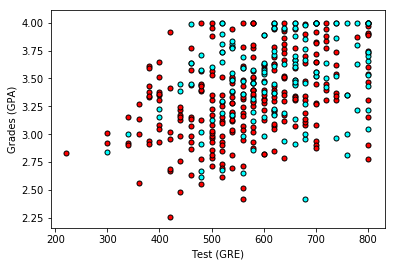

In [8]:
import matplotlib.pyplot as plt

def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
plot_points(data)
plt.show()

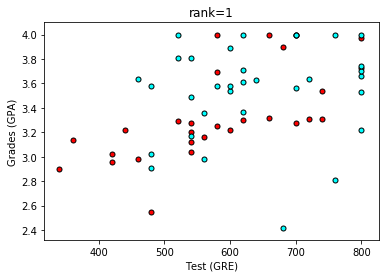

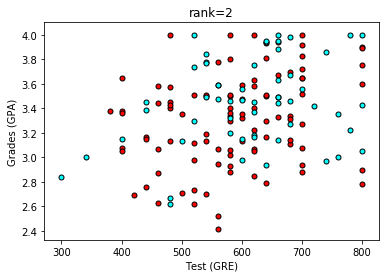

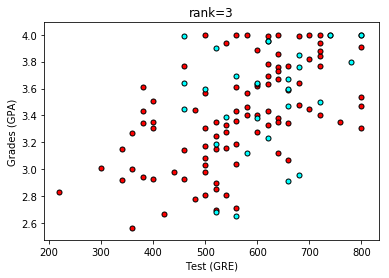

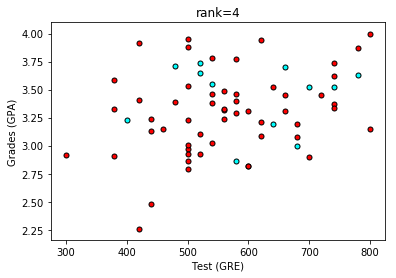

In [10]:
data_rank_1 = data[data["rank"]==1]
data_rank_2 = data[data["rank"]==2]
data_rank_3 = data[data["rank"]==3]
data_rank_4 = data[data["rank"]==4]

plt.title('rank=1')
plot_points(data_rank_1)
plt.show()

plt.title('rank=2')
plot_points(data_rank_2)
plt.show()

plt.title('rank=3')
plot_points(data_rank_3)
plt.show()

plt.title('rank=4')
plot_points(data_rank_4)
plt.show()

In [11]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [12]:
processed_data = one_hot_data[:]

processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4

processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [16]:
sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.9) , replace = False)
train_data , test_data = processed_data.iloc[sample] , processed_data.drop(sample)

print('no of training sample is:' , len(train_data))
print('no of test sample is:' , len(test_data))
print(train_data[:10])
print(test_data[:10])

no of training sample is: 360
no of test sample is: 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
33       1  1.000  1.0000       0       0       1       0
351      0  0.775  0.8575       0       0       1       0
126      1  0.750  0.8850       1       0       0       0
0        0  0.475  0.9025       0       0       1       0
368      0  0.725  1.0000       1       0       0       0
58       0  0.500  0.9125       0       1       0       0
151      0  0.500  0.8450       0       1       0       0
31       0  0.950  0.8375       0       0       1       0
50       0  0.800  0.9650       0       0       1       0
153      0  0.725  0.8650       0       0       1       0
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
12       1  0.950  1.0000       1       0       0       0
21       1  0.825  0.9075       0       1       0       0
30       0  0.675  0.9450       0       0       0       1
46       1  0.725  0.8650       0       1       0       0
56       0  0.700

In [17]:
import keras

features = np.array(train_data.drop('admit' , axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'] , 2))
features_test = np.array(test_data.drop('admit' , axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'] , 2))

print(features[:10])
print(targets[:10])

Using TensorFlow backend.


[[1.     1.     0.     0.     1.     0.    ]
 [0.775  0.8575 0.     0.     1.     0.    ]
 [0.75   0.885  1.     0.     0.     0.    ]
 [0.475  0.9025 0.     0.     1.     0.    ]
 [0.725  1.     1.     0.     0.     0.    ]
 [0.5    0.9125 0.     1.     0.     0.    ]
 [0.5    0.845  0.     1.     0.     0.    ]
 [0.95   0.8375 0.     0.     1.     0.    ]
 [0.8    0.965  0.     0.     1.     0.    ]
 [0.725  0.865  0.     0.     1.     0.    ]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [35]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense , Dropout , Activation
from keras.optimizers import SGD
from keras.utils import np_utils

model = Sequential()
model.add(Dense(256 , activation = 'relu' , input_shape = (6,)))
model.add(Dropout(.4))
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(2 , activation= 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               1792      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 258       
Total params: 34,946
Trainable params: 34,946
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(features, targets, epochs=800, batch_size=100, verbose=0)


In [37]:
score = model.evaluate(features , targets)
print('\ntraining accuracy', score[1])

score = model.evaluate(features_test , targets_test)
print('\ntest accuracy', score[1])

360/360 [==============================] - 1s 1ms/step

training accuracy 0.7638888888888888
40/40 [==============================] - 0s 164us/step

test accuracy 0.575
